In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import joblib as joblib

In [6]:
df = pd.read_csv("zomato.csv")

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
df[df['votes'] == 0].shape[0]

10027

In [10]:
df = df[df['votes'] != 0]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41690 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          41690 non-null  object
 1   address                      41690 non-null  object
 2   name                         41690 non-null  object
 3   online_order                 41690 non-null  object
 4   book_table                   41690 non-null  object
 5   rate                         41646 non-null  object
 6   votes                        41690 non-null  int64 
 7   phone                        40873 non-null  object
 8   location                     41690 non-null  object
 9   rest_type                    41541 non-null  object
 10  dish_liked                   23485 non-null  object
 11  cuisines                     41679 non-null  object
 12  approx_cost(for two people)  41440 non-null  object
 13  reviews_list                 41

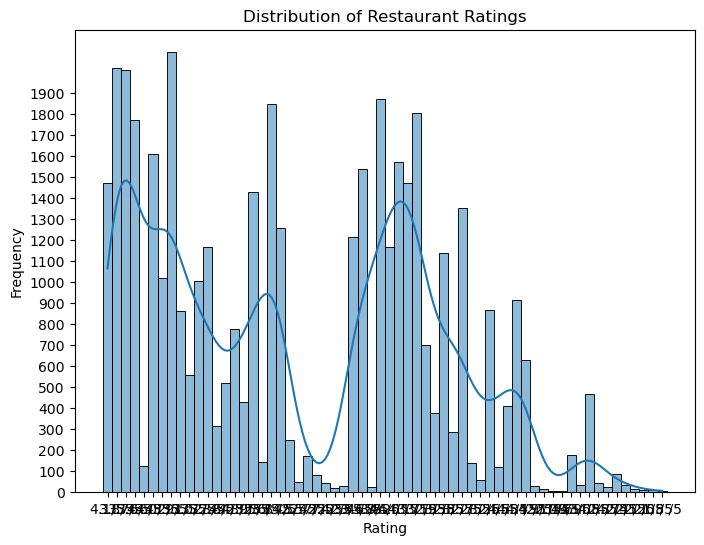

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(df['rate'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.yticks(ticks=range(0, 2000, 100))   
plt.show()

In [14]:
df = df[df['votes'] >= 150]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15124 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          15124 non-null  object
 1   address                      15124 non-null  object
 2   name                         15124 non-null  object
 3   online_order                 15124 non-null  object
 4   book_table                   15124 non-null  object
 5   rate                         15102 non-null  object
 6   votes                        15124 non-null  int64 
 7   phone                        14883 non-null  object
 8   location                     15124 non-null  object
 9   rest_type                    15097 non-null  object
 10  dish_liked                   14937 non-null  object
 11  cuisines                     15123 non-null  object
 12  approx_cost(for two people)  15041 non-null  object
 13  reviews_list                 15

In [16]:
#removing '/5' from all rows
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df['rate'].head()

0    4.1
1    4.1
2    3.8
4    3.8
5    3.8
Name: rate, dtype: float64

In [17]:
df['target'] = np.where(df['rate'] > 3.75, 1, 0)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,1
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari,1


In [18]:
#changing datatype of approx_cost to float
df["approx_cost(for two people)"] = pd.to_numeric(df["approx_cost(for two people)"],errors="coerce")
df["approx_cost(for two people)"].head()

0    800.0
1    800.0
2    800.0
4    600.0
5    600.0
Name: approx_cost(for two people), dtype: float64

In [19]:
# Filling NaN values in 'location' column with corresponding values from 'listed_in(city)' column

df['location'] = df['location'].fillna(df['listed_in(city)'])
 
# Filling NaN values in 'rest_type' with the mode (most frequent value)
mode_rest_type = df['rest_type'].mode()[0]
df['rest_type'].fillna(mode_rest_type, inplace=True)

# Filling NaN values in 'approx_cost(for two people)' with the mean
mean_cost = df['approx_cost(for two people)'].mean()
df['approx_cost(for two people)'].fillna(mean_cost, inplace=True) 

In [124]:
#new dataframe data 
data = df[["online_order","book_table","rest_type","location","approx_cost(for two people)","target"]]
data.head()

,online_order,book_table,rest_type,location,approx_cost(for two people),target
0,Yes,Yes,Casual Dining,Banashankari,800.0,1
1,Yes,No,Casual Dining,Banashankari,800.0,1
2,Yes,No,"Cafe, Casual Dining",Banashankari,800.0,1
4,No,No,Casual Dining,Basavanagudi,600.0,1
5,Yes,No,Casual Dining,Basavanagudi,600.0,1


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15123 entries, 0 to 51715
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 15123 non-null  object 
 1   book_table                   15123 non-null  object 
 2   rest_type                    15123 non-null  object 
 3   location                     15123 non-null  object 
 4   approx_cost(for two people)  15123 non-null  float64
 5   target                       15123 non-null  int32  
dtypes: float64(1), int32(1), object(4)
memory usage: 768.0+ KB


In [126]:
data.isna().sum()

online_order                   0
book_table                     0
rest_type                      0
location                       0
approx_cost(for two people)    0
target                         0
dtype: int64

In [127]:
data.isna().sum()

online_order                   0
book_table                     0
rest_type                      0
location                       0
approx_cost(for two people)    0
target                         0
dtype: int64

In [128]:
print(data.columns)


Index(['online_order', 'book_table', 'rest_type', 'location',
       'approx_cost(for two people)', 'target'],
      dtype='object')


In [129]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler , MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

In [135]:
numeric_features = ['approx_cost(for two people)']
categorical_features = ['online_order', 'book_table', 'rest_type','location']

numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [136]:
x = data.drop("target",axis=1)
y = data["target"]

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [133]:
models = list()
models.append(("LR",LogisticRegression()))
models.append(("SVM",SVC()))
models.append(("CART",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("XG",XGBClassifier()))

 

In [137]:
for name , model in models: 
    steps = list()
    steps.append(("Preprosser",preprocessor))
    steps.append(("classifier",model))
    pipeline = Pipeline(steps=steps)
    scores = cross_validate(pipeline,  x,  y,cv=5,scoring="accuracy",return_train_score=True)
    print(f'Model: {name}')
    print("Train_Accuracy", scores["train_score"].mean())
    print("Test_accuracy",scores["test_score"].mean())
    print("-"*25)

c:\Users\Ali\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ali\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Model: LR
Train_Accuracy 0.854278252797077
Test_accuracy 0.8523440465258647
-------------------------
Model: SVM
Train_Accuracy 0.8727931674502567
Test_accuracy 0.8619986663168483
-------------------------
Model: CART
Train_Accuracy 0.9403723245313561
Test_accuracy 0.9119898771262408
-------------------------
Model: RF
Train_Accuracy 0.9403392639478367
Test_accuracy 0.9137091477546022
-------------------------
Model: XG
Train_Accuracy 0.9064339781472495
Test_accuracy 0.8869935502208228
-------------------------


In [138]:
steps = list()
steps.append(("preprocessor", preprocessor))
steps.append(("classifier",RandomForestClassifier(random_state=42)))
pipeline = Pipeline(steps=steps)

In [139]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV

In [140]:
RandomForestClassifier()


RandomForestClassifier()

In [141]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['auto', 'sqrt']
}

In [142]:
grid = GridSearchCV(pipeline , param_grid=param_grid, cv= 5 , scoring= "accuracy", return_train_score=True)


In [143]:
grid.fit(x,y)


c:\Users\Ali\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Ali\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Ali\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Random

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['approx_cost(for '
                                                                          'two '
                                                                          'people)']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['online_order',
                                                                          'book_table',
                                                                          'rest_type',
                                                                          'location'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__max_features': ['auto', 'sqrt'],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [144]:
grid.best_estimator_


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['approx_cost(for two '
                                                   'people)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['online_order', 'book_table',
                                                   'rest_type',
                                                   'location'])])),
                ('classifier',
                 RandomForestClassifier(max_features='auto',
                                        min_samples_split=5, n_estimators=200,
                                        random_state=42))])

In [145]:
grid.best_params_


{'classifier__max_depth': None,
 'classifier__max_features': 'auto',
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 200}

In [146]:
grid.best_score_


0.9145025361843542

In [147]:
print(grid.cv_results_["mean_train_score"].mean() )
print(grid.cv_results_["mean_test_score"].mean())

0.8922938614493895
0.8774737344585829


In [148]:
print(grid.cv_results_["mean_train_score"].max() )
print(grid.cv_results_["mean_test_score"].max())

0.9403723245313561
0.9145025361843542


In [150]:
model = grid.best_estimator_

In [151]:
model.predict


<bound method Pipeline.predict of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['approx_cost(for two '
                                                   'people)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['online_order', 'book_table',
                                                   'rest_type',
                                                   'location'])])),
                ('classifier',
                 RandomForestClassifier(max_features='auto',
                                        min_samples_split=5, n_estimators=200,
                                        random_state=42))])>

In [152]:
joblib.dump(model , "final_model.pk1")

['final_model.pk1']

In [153]:
joblib.dump(x,"input.pk1")

['input.pk1']